In [12]:
!pip install yfinance

#Applied-ML-assignment

In [13]:
import pandas as pd

In [14]:
ford=pd.read_csv("/content/ford_stock_data.csv")

In [15]:
ford

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-02,12.38,12.44,12.23,12.31,11.482059,51204000
1,2023-10-03,12.16,12.23,12.02,12.07,11.258199,55074700
2,2023-10-04,12.02,12.08,11.88,11.99,11.183580,45217900
3,2023-10-05,11.94,12.00,11.69,11.90,11.099633,47425000
4,2023-10-06,11.82,12.15,11.69,12.00,11.192908,57498400
...,...,...,...,...,...,...,...
247,2024-09-25,10.59,10.59,10.32,10.42,10.420000,74109600
248,2024-09-26,10.56,10.75,10.56,10.68,10.680000,51408500
249,2024-09-27,10.84,10.99,10.76,10.78,10.780000,45469600
250,2024-09-30,10.48,10.61,10.43,10.56,10.560000,59662900


#Plotting Stock Data

Visualize the closing prices of the stock using any plotting library. Highlight the 52-week high and low.

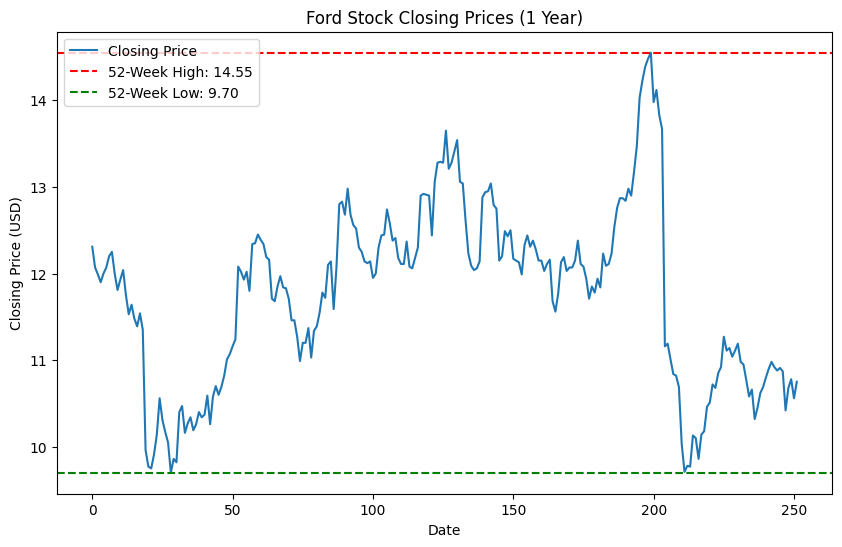

In [16]:
import matplotlib.pyplot as plt
closing_prices = ford['Close']

#52-week high and low
high_52_week = ford['Close'].max()
low_52_week = ford['Close'].min()

#closing prices
plt.figure(figsize=(10, 6))
plt.plot(ford['Close'], label='Closing Price')

plt.axhline(y=high_52_week, color='r', linestyle='--', label=f'52-Week High: {high_52_week:.2f}')
plt.axhline(y=low_52_week, color='g', linestyle='--', label=f'52-Week Low: {low_52_week:.2f}')
plt.title('Ford Stock Closing Prices (1 Year)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

#Findings:
The highest closing price recorded in the past year was 14.55 USD. The lowest closing price in the past year was 9.70 USD.
Overall Trend: The stock price has fluctuated over the year. There were periods of growth, followed by periods of decline. Overall, the stock price appears to have increased slightly over the past year.

https://www.business-standard.com/companies/news/ford-planning-to-re-enter-india-to-restart-tamil-nadu-plant-for-exports-124091300701_1.html

#Grouping Stock Prices

Group the days where the closing price, rounded to the nearest integer, is the same. Create a bar chart to represent this.

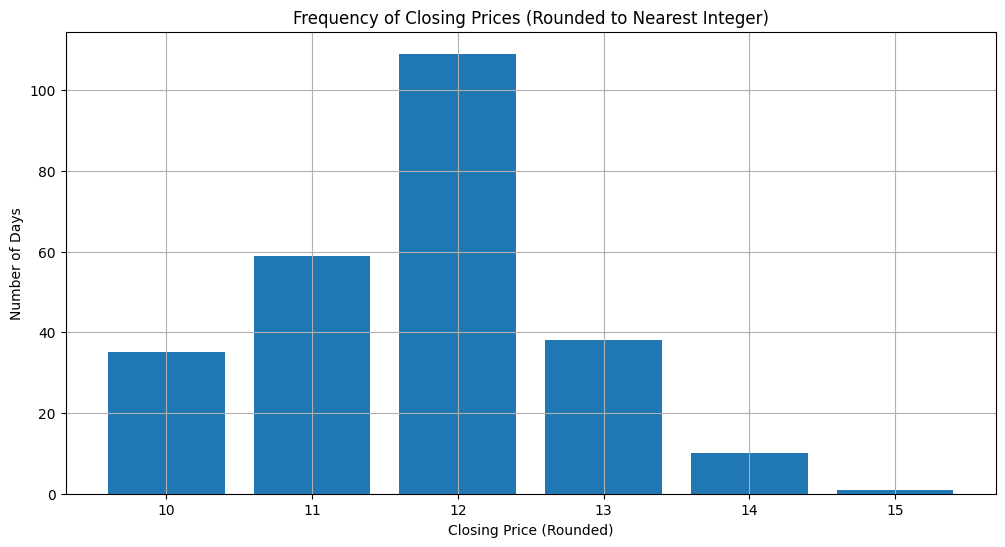

In [17]:
#grouping closing prices
closing_price_counts = ford['Close'].round(0).value_counts()

plt.figure(figsize=(12, 6))
plt.bar(closing_price_counts.index, closing_price_counts.values)
plt.title('Frequency of Closing Prices (Rounded to Nearest Integer)')
plt.xlabel('Closing Price (Rounded)')
plt.ylabel('Number of Days')
plt.grid(True)
plt.show()

#Findings:
Most Frequent Closing Price: The most frequent closing price was 12 USD.
Distribution: The distribution of closing prices is skewed to the right, with a longer tail on the higher end. This indicates that there were more days with closing prices above 12 USD than below 12 USD.
Range: The closing prices ranged from 10 USD to 15 USD.

https://markets.businessinsider.com/news/stocks/ford-motor-analysis-strategic-shifts-amid-financial-challenges-and-ev-market-adaptation-1033812826

#Weekly High-Low Analysis

Side-by-side bar chart for weekly high and low prices. Create a function to filter data by threshold and plot based on "absolute" or "percent" difference.

[*********************100%***********************]  1 of 1 completed


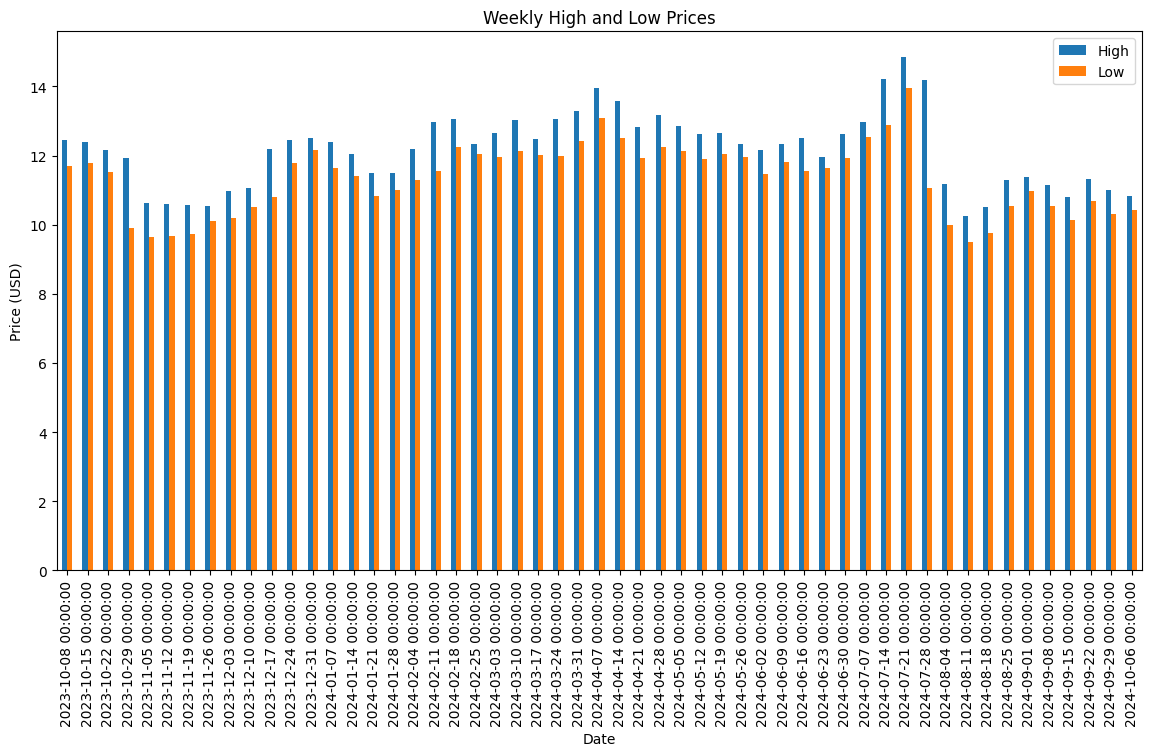

No weeks found with absolute difference greater than 10


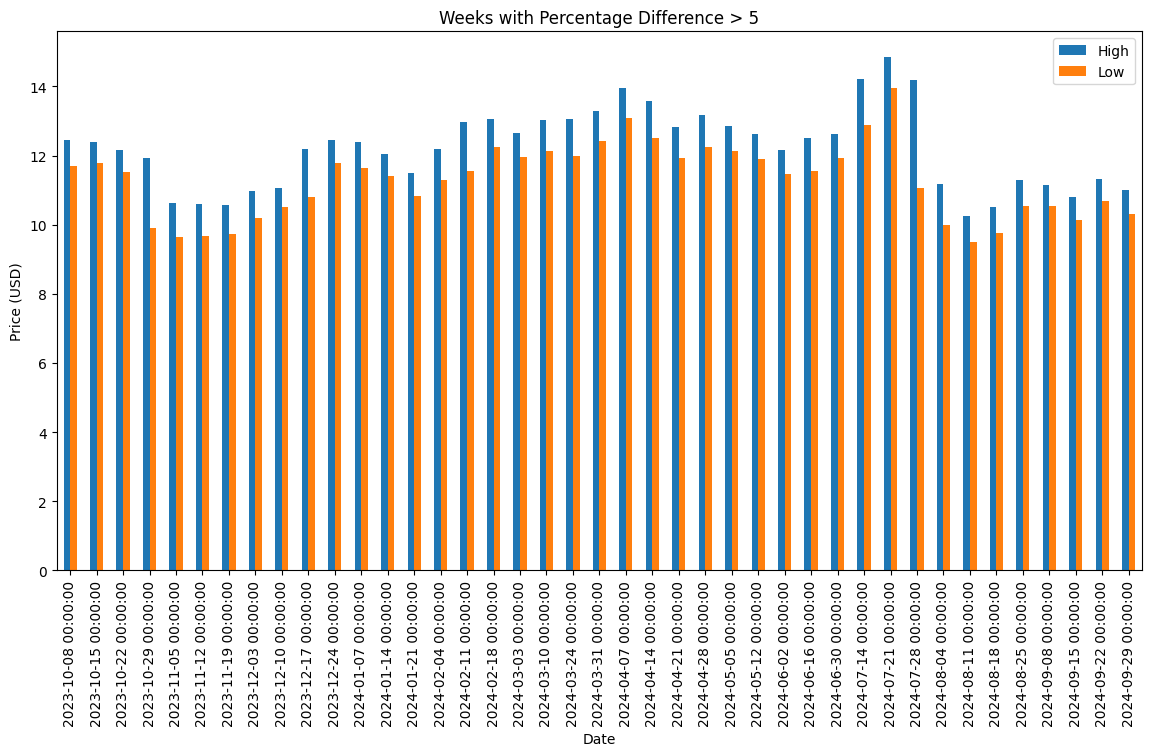

In [18]:
# If you are fetching the stock data using yfinance:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch one year's worth of stock data for Ford (F)
stock_ticker = 'F'
ford = yf.download(stock_ticker, period="1y")

# If you have the data saved in a CSV file, load it as follows:
# ford = pd.read_csv('ford_stock_data.csv', index_col='Date', parse_dates=True)

# Ensure that 'Date' is set as the index for proper time-based resampling
ford.index = pd.to_datetime(ford.index)


# Resample the data to get weekly high and low prices

weekly_data = ford.resample('W').agg({'High': 'max', 'Low': 'min'})

# Side-by-side bar chart of weekly high and low prices
weekly_data[['High', 'Low']].plot(kind='bar', figsize=(14, 7))
plt.title('Weekly High and Low Prices')
plt.ylabel('Price (USD)')
plt.show()

# Function to filter and replot based on threshold
def filter_by_threshold(threshold, difference_type='absolute'):
    # Check for absolute or percentage difference
    if difference_type == 'absolute':
        filtered_data = weekly_data[(weekly_data['High'] - weekly_data['Low']) > threshold]
    elif difference_type == 'percent':
        filtered_data = weekly_data[((weekly_data['High'] - weekly_data['Low']) / weekly_data['Low']) * 100 > threshold]

    # Plot filtered weekly high and low prices
    if not filtered_data.empty:
        filtered_data[['High', 'Low']].plot(kind='bar', figsize=(14, 7))
        plt.title(f'Weeks with {"Absolute" if difference_type == "absolute" else "Percentage"} Difference > {threshold}')
        plt.ylabel('Price (USD)')
        plt.show()
    else:
        print(f"No weeks found with {difference_type} difference greater than {threshold}")

# Example: filtering by absolute difference
filter_by_threshold(10, difference_type='absolute')

# Example: filtering by percentage difference
filter_by_threshold(5, difference_type='percent')



Findings: https://247wallst.com/forecasts/2024/10/01/ford-f-price-prediction-and-forecast-2025-2030/

#Data Analysis
Ford's stock shows moderate volatility with no significant upward trends.
The data is reliable for short-term insights but lacks broader market context.
Investment Decision:
Cautious buy based on stability; further info on market trends and financials is needed.

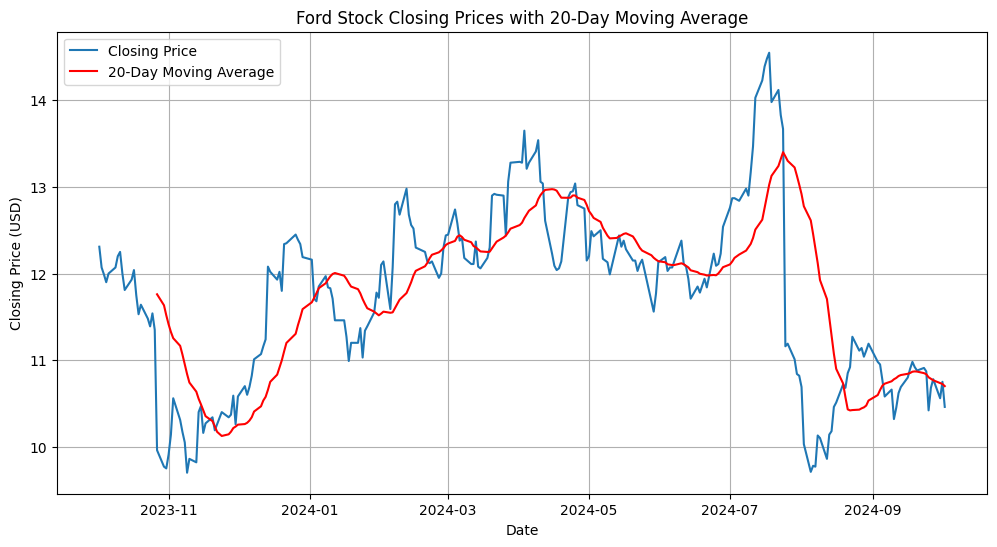

In [19]:

def calculate_and_plot_moving_average(data, window):
    moving_average = data['Close'].rolling(window=window).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(moving_average, label=f'{window}-Day Moving Average', color='red')
    plt.title(f'Ford Stock Closing Prices with {window}-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
calculate_and_plot_moving_average(ford, window=20)

#Findings:
Line Graph: Shows the closing price over time, with 52-week high and low.
Histogram: Shows the frequency of different closing prices.
Line Graph with Moving Average: Compares the closing price to a 20-day moving average to identify trends.

https://seekingalpha.com/symbol/F